# Weekly Sales Forecasting using ML Algorithms

# Step 1 -- Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.decomposition import PCA

# Step 2 -- Load Dataset

In [2]:
df=pd.read_csv('Walmart.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


# Step 3 -- Exploratory Data Analysis (EDA)

In [3]:
df.info() #gives all details about DataFrame like - class,total cols & rows,datatype,memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
df.describe() # gives statistical summary of all numeric columns like count,avg,min,max etc

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [5]:
df.shape # shows total rows & cols --- 6435 rows & 8 columns

(6435, 8)

In [6]:
df.columns # displays all columns name

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [7]:
df['Holiday_Flag'].value_counts() # shows total count of each category

Holiday_Flag
0    5985
1     450
Name: count, dtype: int64

In [8]:
df.isnull().sum() # displays total null values in each columns

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [9]:
df.head() # displays first n rows -- by default it displays top 5 rows

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [10]:
df.tail(6) # displays last 6 rows -- by default it displays last 5 rows

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6429,45,21-09-2012,723086.20,0,65.32,4.038,191.856704,8.684
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [11]:
# converting Date column datatype from 'string' to 'datatime'
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)

# sorting df according to Date in ascending format
df.sort_values('Date', inplace=True)

# checking datatype of Date col
df['Date'].dtype

dtype('<M8[ns]')

# Step 4 Data Preprocessing

In [12]:
# Feature Engineering --- extracting year,month,month name,week no from date column

df['Year'] = df['Date'].dt.year.astype(int)
df['Month'] = df['Date'].dt.month
df['Week_No'] = df['Date'].dt.isocalendar().week
#df['Month_Name'] = df['Date'].dt.month_name()

In [13]:
# Creating yearly df from original df to calculate Yearly Sales
df_Yearly = df.groupby('Year', as_index=False)['Weekly_Sales'].sum()
df_Yearly.rename(columns={'Weekly_Sales': 'Yearly_Sales'}, inplace=True)
df_Yearly

,Year,Yearly_Sales
0,2010,2.288886e+09
1,2011,2.448200e+09
2,2012,2.000133e+09


In [14]:
# Creating monthly df from original df to calculate Monthly Sales
df_Monthly= df.groupby(['Year', 'Month'],as_index=False)['Weekly_Sales'].sum().round()
df_Monthly.rename(columns={'Weekly_Sales': 'Monthly_Sales'}, inplace=True)
df_Monthly.sort_values(['Year', 'Month'], inplace=True)
df_Monthly

,Year,Month,Monthly_Sales
0,2010,2,190332983.0
1,2010,3,181919802.0
2,2010,4,231412368.0
3,2010,5,186710934.0
4,2010,6,192246172.0
5,2010,7,232580126.0
6,2010,8,187640111.0
7,2010,9,177267896.0
8,2010,10,217161824.0
9,2010,11,202853370.0


In [15]:
# Merging diff df into 1 df
df=pd.merge(df,df_Yearly,on='Year',how='left')
df=pd.merge(df,df_Monthly,on=['Year','Month'],how='left')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week_No,Yearly_Sales,Monthly_Sales
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,2.288886e+09,190332983.0
1,10,2010-02-05,2193048.75,0,54.34,2.962,126.442065,9.765,2010,2,5,2.288886e+09,190332983.0
2,37,2010-02-05,536006.73,0,45.97,2.572,209.852966,8.554,2010,2,5,2.288886e+09,190332983.0
3,17,2010-02-05,789036.02,0,23.11,2.666,126.442065,6.548,2010,2,5,2.288886e+09,190332983.0
4,30,2010-02-05,465108.52,0,39.05,2.572,210.752605,8.324,2010,2,5,2.288886e+09,190332983.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,25,2012-10-26,688940.94,0,56.69,3.882,216.151590,7.293,2012,10,43,2.000133e+09,184361680.0
6431,5,2012-10-26,319550.77,0,71.70,3.506,224.037814,5.422,2012,10,43,2.000133e+09,184361680.0
6432,40,2012-10-26,921264.52,0,49.65,3.917,138.728161,4.145,2012,10,43,2.000133e+09,184361680.0
6433,18,2012-10-26,1127516.25,0,56.09,3.917,138.728161,8.243,2012,10,43,2.000133e+09,184361680.0


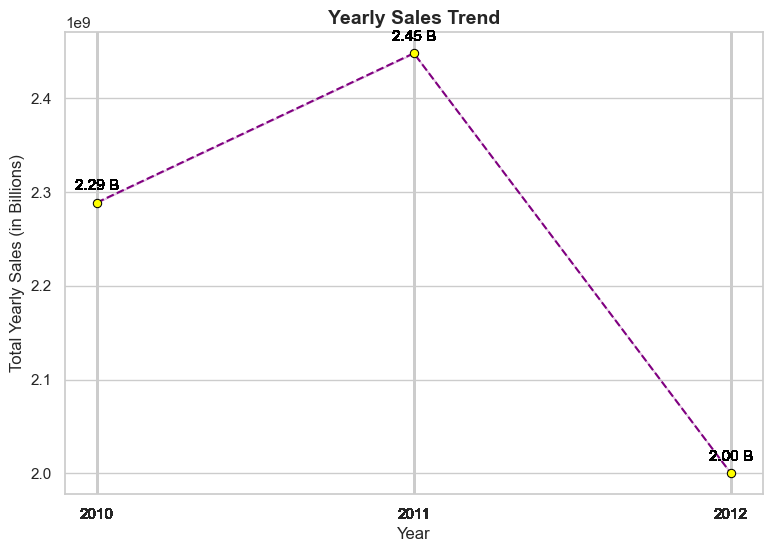

In [16]:
# Visualize yearly sales trends --- lineplot
plt.figure(figsize=(9,6))
sns.set_style("whitegrid")
sns.set_context("notebook")

sns.lineplot(data=df,x='Year',y='Yearly_Sales',color='purple',
             marker='o',markerfacecolor='yellow',markeredgecolor='black',linestyle='--')

plt.title("Yearly Sales Trend", fontsize=14, weight='bold')
plt.xlabel("Year")
plt.ylabel("Total Yearly Sales (in Billions)")
plt.xticks(df['Year']) # displays the values of col Year


# Add labels on markers
for i in range(len(df)):
    plt.text(df['Year'][i], # selects i value from year
    df['Yearly_Sales'][i] + 1e7,  # selects i value from yearly sales & add 1e7(10 million) to appear text above marker
    f"{df['Yearly_Sales'][i]/1e9:.2f} B", # displays label text --- converts random no to billion by dividing 1e9 with :.2f (2 decml) & B(Billion)
    ha='center', va='bottom',fontsize=11, color='black')
plt.show()

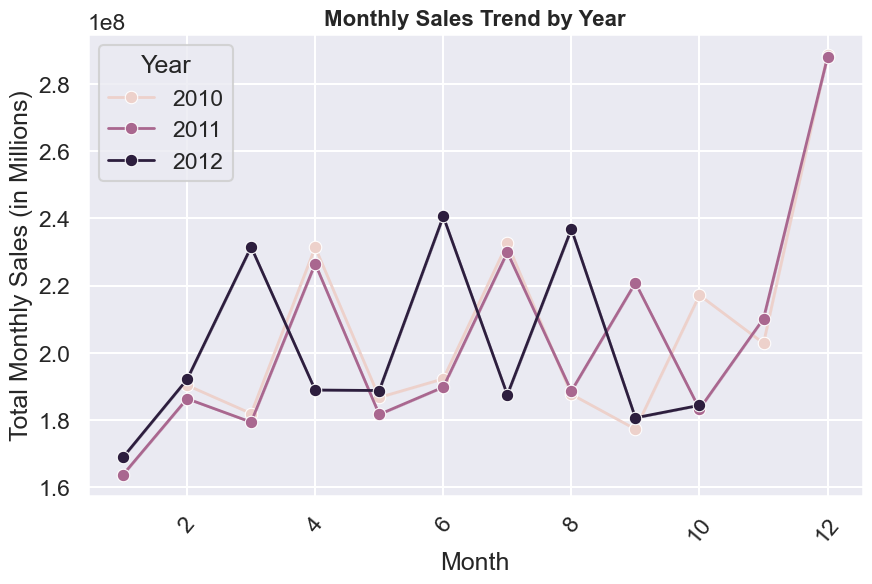

In [17]:
# Visualize monthly sales trends --- lineplot
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
sns.set_context("talk")

sns.lineplot(data=df,x='Month',y='Monthly_Sales',hue='Year',marker='o',linewidth=2)

plt.title("Monthly Sales Trend by Year", fontsize=16, weight='bold')
plt.xlabel("Month")
plt.ylabel("Total Monthly Sales (in Millions)")
plt.xticks(rotation=50)
plt.legend(title='Year')
plt.show()

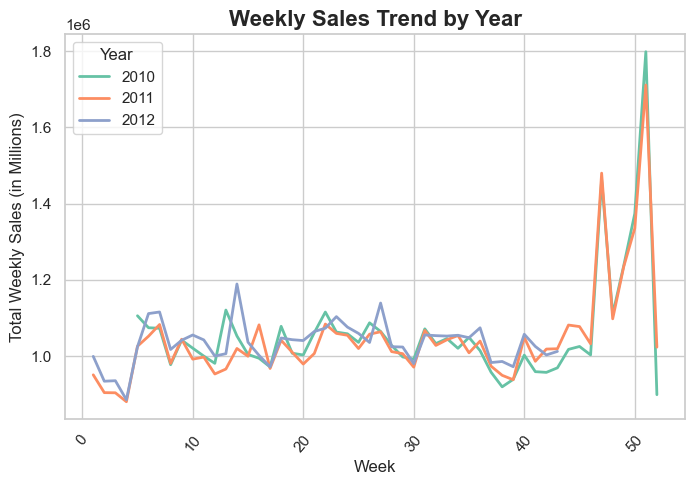

In [18]:
# Visualize weekly sales trends using lineplot
plt.figure(figsize=(8,5))
sns.set_style("whitegrid") 
sns.set_context("notebook")

sns.lineplot(data=df,x='Week_No',y='Weekly_Sales',hue='Year',palette='Set2',linewidth=2,errorbar=None)
plt.title('Weekly Sales Trend by Year', fontsize=16, weight='bold')
plt.xlabel('Week')
plt.ylabel('Total Weekly Sales (in Millions)')
plt.xticks(rotation=50)
plt.legend(title='Year')
plt.show()

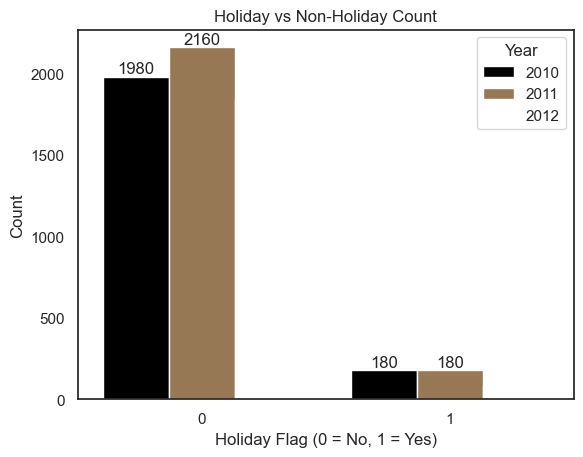

In [19]:
# Counting total Holidays & Non-Holidays Year wise using countplot
sns.set_style("white") 
b = sns.countplot(data=df,x='Holiday_Flag',palette='cubehelix',hue='Year')
b.bar_label(b.containers[0]) # adds label on top of 1 value
b.bar_label(b.containers[1]) # adds label on top of 2 value
plt.title("Holiday vs Non-Holiday Count")
plt.xlabel("Holiday Flag (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

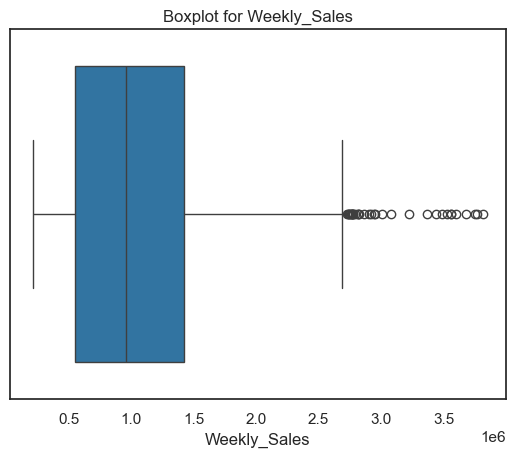

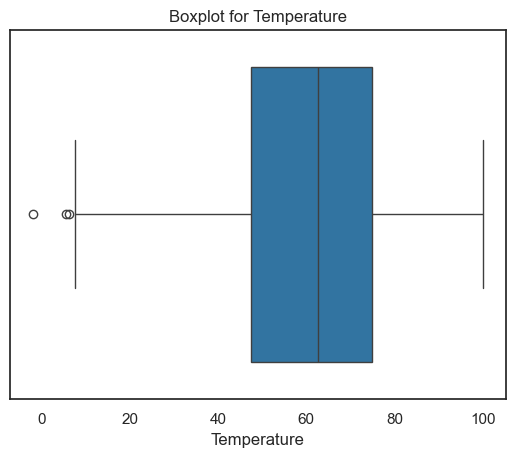

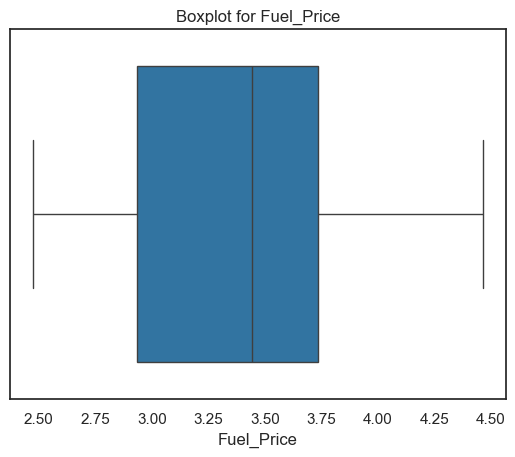

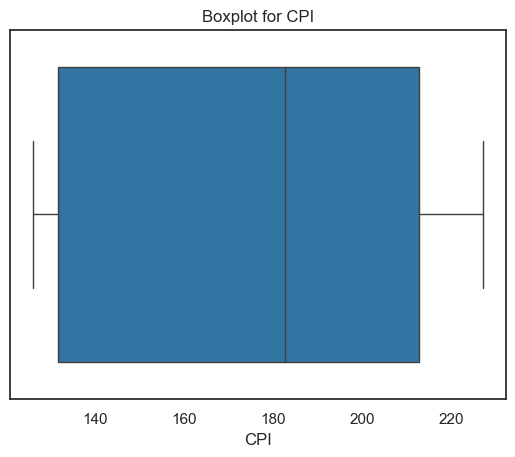

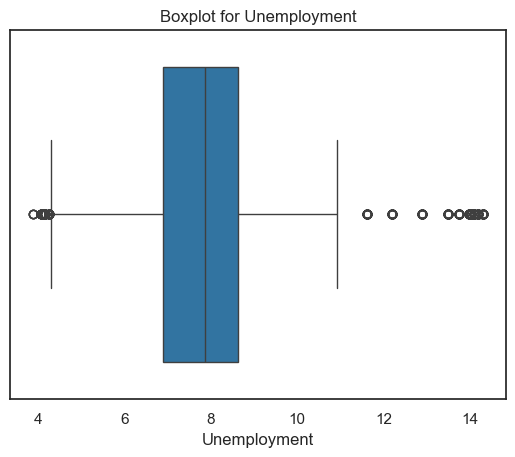

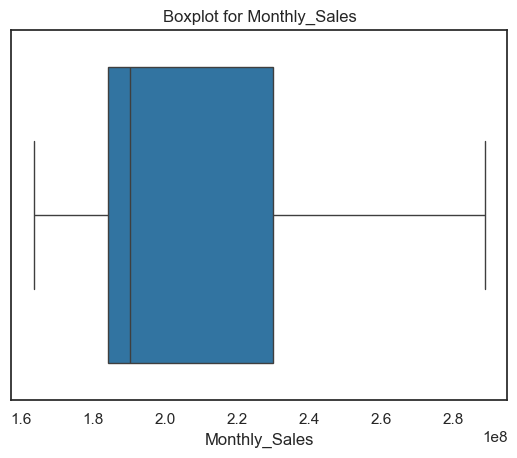

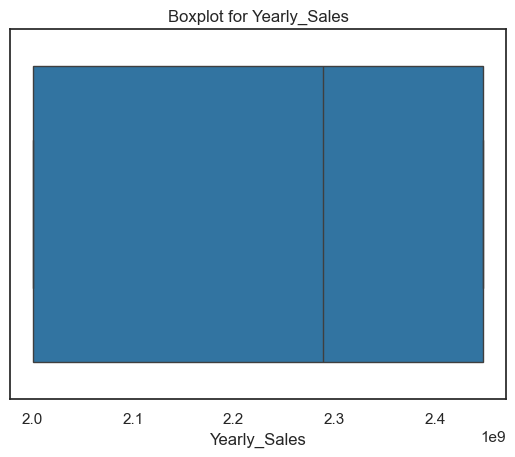

In [20]:
# Checking Outliers in Numeric Cols using boxplot
numeric_cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment','Monthly_Sales','Yearly_Sales']
for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

In [21]:
# Removing Outliers
cols=['Weekly_Sales','Temperature','Unemployment']

def remove_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        factor=1.5
        LOWER_LIMIT = Q1 - factor * IQR
        UPPER_LIMIT = Q3 + factor * IQR
        df = df[(df[col] >= LOWER_LIMIT) & (df[col] <= UPPER_LIMIT)]
    return df

df_cleaned = remove_outliers(df, cols)

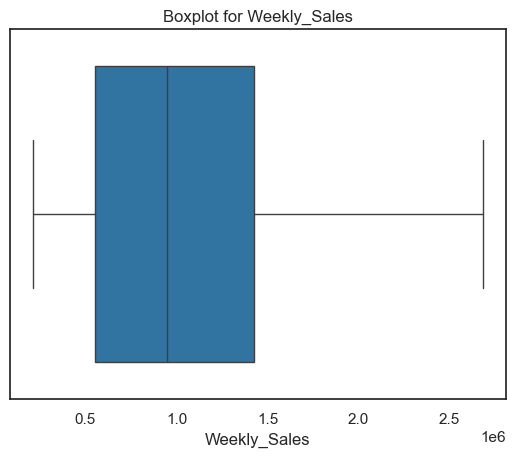

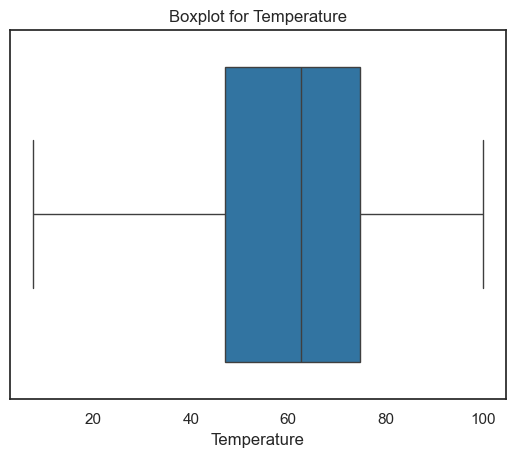

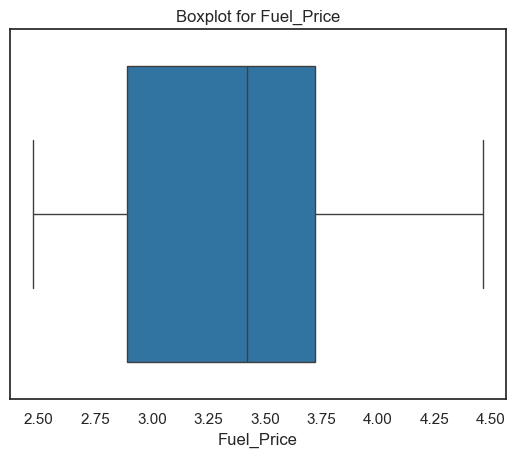

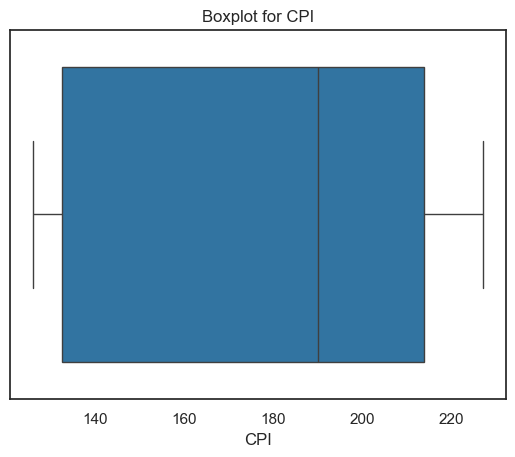

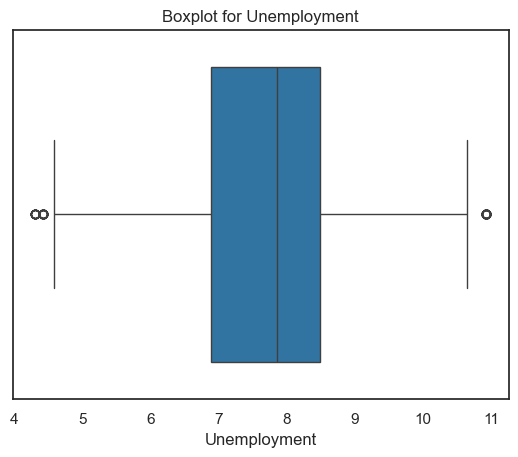

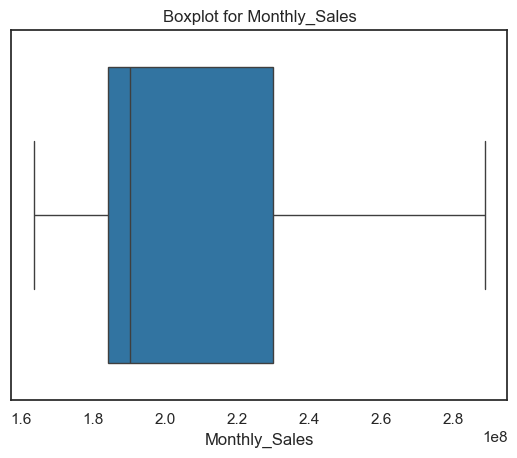

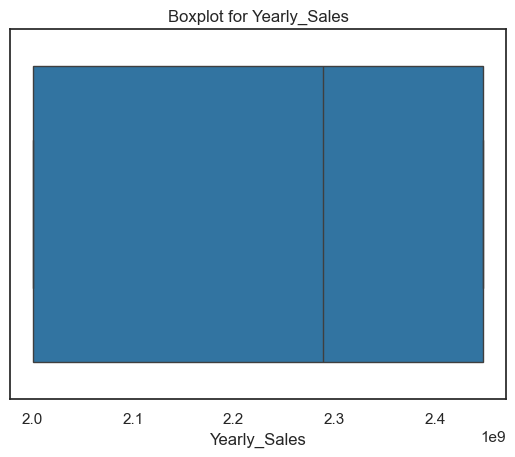

In [22]:
# Plotting boxplot after removing outliers
numeric_cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment','Monthly_Sales','Yearly_Sales']
#plt.figure(figsize=(12,6))
for col in numeric_cols:
    sns.boxplot(x=df_cleaned[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

In [23]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week_No,Yearly_Sales,Monthly_Sales
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,2.288886e+09,190332983.0
1,10,2010-02-05,2193048.75,0,54.34,2.962,126.442065,9.765,2010,2,5,2.288886e+09,190332983.0
2,37,2010-02-05,536006.73,0,45.97,2.572,209.852966,8.554,2010,2,5,2.288886e+09,190332983.0
3,17,2010-02-05,789036.02,0,23.11,2.666,126.442065,6.548,2010,2,5,2.288886e+09,190332983.0
4,30,2010-02-05,465108.52,0,39.05,2.572,210.752605,8.324,2010,2,5,2.288886e+09,190332983.0


In [24]:
# Creating features & target
x=df.drop(columns=['Date','Weekly_Sales','Yearly_Sales','Monthly_Sales'],axis=1)
y=df['Weekly_Sales']

<Axes: >

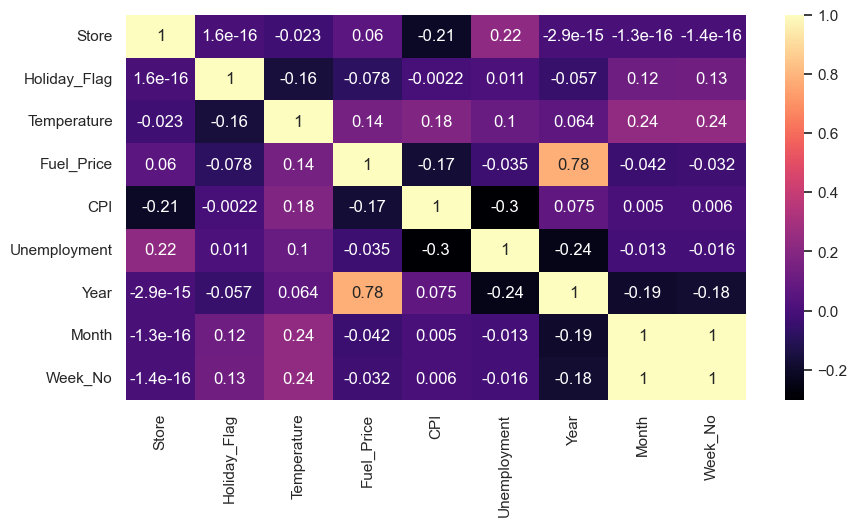

In [25]:
# creating correlation of x
plt.figure(figsize=(10,5))
sns.heatmap(x.corr(), annot=True, cmap='magma')

In [26]:
# Train-test-split df
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
# Scaling 
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

# Step 5 -- Model Training

In [28]:
# creating dictionary of models
models = {"Linear Regression": LinearRegression(),"Ridge Regression": Ridge(alpha=10,max_iter=100),
"Lasso Regression": Lasso(alpha=10,max_iter=100),"Decision Tree": DecisionTreeRegressor(random_state=42),
"Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)}

In [29]:
# creating result list
result=[]
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    r2=r2_score(y_test,y_pred)
    result.append([name,rmse,r2])

C:\Users\Tisha\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.556e+14, tolerance: 1.648e+11
  model = cd_fast.enet_coordinate_descent(


In [30]:
# creating results df
results=pd.DataFrame(result)
results.columns=['Model','RMSE','r2_score']
results

,Model,RMSE,r2_score
0,Linear Regression,518021.236303,0.139198
1,Ridge Regression,518119.932185,0.138870
2,Lasso Regression,518135.749135,0.138817
3,Decision Tree,167187.390925,0.910337
4,Random Forest,124794.993502,0.950042


# Step 6 -- Model Comparision 

C:\Users\Tisha\AppData\Local\Temp\ipykernel_66132\194103424.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results,x='Model', y='r2_score',palette='Set1')


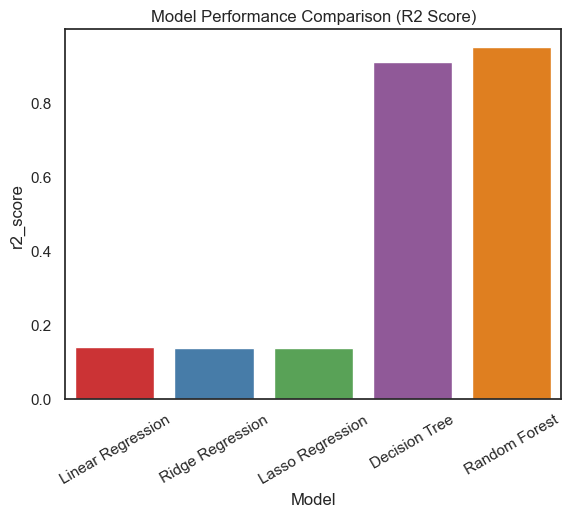

In [31]:
sns.barplot(data=results,x='Model', y='r2_score',palette='Set1')
plt.title("Model Performance Comparison (R2 Score)")
plt.xticks(rotation=30)
plt.show()

# Step 7 -- Principal Component Analysis (PCA)

In [32]:
pca = PCA(n_components=5)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

rf_pca = RandomForestRegressor(n_estimators=100, random_state=42)
rf_pca.fit(x_train_pca, y_train)
y_pred_pca = rf_pca.predict(x_test_pca)

rmse_pca = np.sqrt(mean_squared_error(y_test, y_pred_pca))
r2_pca = r2_score(y_test, y_pred_pca)
print("PCA Model RMSE:", rmse_pca)
print("PCA Model R2:", r2_pca)

PCA Model RMSE: 393470.997484563
PCA Model R2: 0.5033691884240132


# Step 8 -- Business Insights

In [33]:
print("Business Insight:")
print('''1.The Random Forest model is the most dependable for forecasting weekly sales, with the best results (R² = 0.95).
2.Due to holidays and promotions, sales are very seasonal, with the largest increase occurring in November and December.
3.Demand peaks during holidays, so prepare ahead of time by building up inventory and adding more transportation capacity.
4.Stable production and restocking plans are made possible by steady weekly sales trends all year long.
5.Sales volume is impacted by economic conditions (CPI, fuel price); keep a close eye on these to make necessary prediction modifications.
6.Sales declines in 2012 show how sensitive the market is to unemployment and inflation. Forecasts should take macroeconomic changes into account.
7.While non-holiday weeks predominate, holiday weeks generate a significant portion of income. Therefore, it is important to optimise promotions 
and logistics during these weeks.
8.Precise projections cut overstock by 10–15%, which lowers warehousing and store expenses.
9.Weekly demand visibility improves load management and planning of routes, which saves time and fuel.
10.Avoid dimensionality reduction, which eliminates seasonal or time-based patterns, as the PCA-based model fared poorly (R2 = 0.50).
11.Real-time store-level forecasting is supported by Random Forest, allowing for localised stock and delivery choices.
12.By incorporating the model into supply chain management systems (ERP), automatic restocking can be set up, increasing accuracy and speed.''')

Business Insight:
1.The Random Forest model is the most dependable for forecasting weekly sales, with the best results (R² = 0.95).
2.Due to holidays and promotions, sales are very seasonal, with the largest increase occurring in November and December.
3.Demand peaks during holidays, so prepare ahead of time by building up inventory and adding more transportation capacity.
4.Stable production and restocking plans are made possible by steady weekly sales trends all year long.
5.Sales volume is impacted by economic conditions (CPI, fuel price); keep a close eye on these to make necessary prediction modifications.
6.Sales declines in 2012 show how sensitive the market is to unemployment and inflation. Forecasts should take macroeconomic changes into account.
7.While non-holiday weeks predominate, holiday weeks generate a significant portion of income. Therefore, it is important to optimise promotions 
and logistics during these weeks.
8.Precise projections cut overstock by 10–15%, which l

In [34]:
print('Suggestion:')
print('''Using the Random Forest–based AI forecasting model,the company can predict sales with high accuracy,enabling smarter inventory control,
timely deliveries, and reduced operational costs — directly improving supply chain efficiency and profitability.''')

Suggestion:
Using the Random Forest–based AI forecasting model,the company can predict sales with high accuracy,enabling smarter inventory control,
timely deliveries, and reduced operational costs — directly improving supply chain efficiency and profitability.


# Step 9 -- Save the Best Model

In [35]:
joblib.dump(models["Random Forest"], "rf_demand_forecast_model.pkl")
print("✅ Project Completed Successfully!")

✅ Project Completed Successfully!
